In [1]:
import random
seed = random.seed(11698797)

import csv
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import model_selection
from sklearn.datasets import make_blobs, load_breast_cancer, load_iris
from sklearn.linear_model import LinearRegression, LogisticRegression
import pandas as pd
!pip install autograd
import autograd.numpy as np
from autograd import grad

music = pd.read_csv("musicData.csv")
print(music)


print(list(music.columns))


music = music.dropna()

       instance_id           artist_name                track_name  \
0          32894.0              Röyksopp      Röyksopp's Night Out   
1          46652.0  Thievery Corporation          The Shining Path   
2          30097.0        Dillon Francis                 Hurricane   
3          62177.0              Dubloadz                     Nitro   
4          24907.0           What So Not          Divide & Conquer   
...            ...                   ...                       ...   
50000      58878.0                 BEXEY                  GO GETTA   
50001      43557.0             Roy Woods       Drama (feat. Drake)   
50002      39767.0                Berner  Lovin' Me (feat. Smiggz)   
50003      57944.0             The-Dream         Shawty Is Da Shit   
50004      63470.0     Naughty By Nature            Hip Hop Hooray   

       popularity  acousticness  danceability  duration_ms  energy  \
0            27.0       0.00468         0.652         -1.0   0.941   
1            31.0  

In [2]:
test_list = []

for genre in music["music_genre"].unique():
    genres = music[music["music_genre"] == genre]
    test = genres.sample(500, replace = False, random_state = seed)
    test_list.extend(list(test.index))
train_list = [i for i in music.index if i not in test_list]

print(len(train_list))

train = music.loc[train_list]
test = music.loc[test_list]

print(len(test_list))

45000
5000


In [3]:
test.drop("artist_name", 1, inplace=True)
test.drop("track_name", 1, inplace=True)

print(test)

train.drop("artist_name", 1, inplace=True)
train.drop("track_name", 1, inplace=True)

print(train)

       instance_id  popularity  acousticness  danceability  duration_ms  \
2651       85846.0        28.0       0.00279         0.808     229023.0   
625        70615.0        38.0       0.06480         0.739     219828.0   
4111       61838.0        38.0       0.02160         0.591         -1.0   
1928       54149.0        36.0       0.03500         0.613     139947.0   
4775       24628.0        65.0       0.00176         0.803     167540.0   
...            ...         ...           ...           ...          ...   
49049      65441.0        56.0       0.18600         0.676     201818.0   
49384      26921.0        55.0       0.10500         0.901     212712.0   
48289      25108.0        65.0       0.04150         0.370     250240.0   
47920      41717.0        55.0       0.13500         0.845     212120.0   
47446      83428.0        61.0       0.19100         0.536     189641.0   

       energy  instrumentalness key  liveness  loudness   mode  speechiness  \
2651    0.711       

In [4]:
tempo_test = test["tempo"]
tempo_train = train["tempo"]
float_tempo_train = []
for tempo in tempo_train:
    if tempo != "?":
        float_tempo_train.append(float(tempo))
meantrain = np.mean(float_tempo_train)
train_tempo = []
for i in tempo_train:
    if i == "?":
        train_tempo.append(meantrain)
    else:
        train_tempo.append(float(i))

float_tempo_test = []
for tempo in tempo_test:
    if tempo != "?":
        float_tempo_test.append(float(tempo))
meantest = np.mean(float_tempo_test)
test_tempo = []
for i in tempo_test:
    if i == "?":
        test_tempo.append(meantest)
    else:
        test_tempo.append(float(i))
test.drop("tempo", 1, inplace=True)
train.drop("tempo", 1, inplace=True)

test["tempo"] = test_tempo
train["tempo"] = train_tempo

In [5]:
print(music["music_genre"].unique())

['Electronic' 'Anime' 'Jazz' 'Alternative' 'Country' 'Rap' 'Blues' 'Rock'
 'Classical' 'Hip-Hop']


In [6]:
genres_test = test["music_genre"]
genres_train = train["music_genre"]

test.drop("music_genre", 1, inplace=True)
train.drop("music_genre", 1, inplace=True)
train, test = train.align(test, join="inner", axis=1)

test_categories = pd.get_dummies(test)
train_categories = pd.get_dummies(train)

train_categories.drop('obtained_date_0/4', 1, inplace=True)

In [7]:
from sklearn.preprocessing import LabelEncoder
le_test = LabelEncoder()
testGenres = le_test.fit_transform(genres_test)

le_train = LabelEncoder()
trainGenres = le_train.fit_transform(genres_train)

In [8]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(train_categories)
X_test = sc.transform(test_categories)

from sklearn.decomposition import PCA
pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [9]:
pc_vals = np.arange(pca.n_components_) + 1
print(pc_vals)

eigenvals = pca.explained_variance_
print(eigenvals)
for i in eigenvals:
    if i > 1:
        print(i)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]
[4.10574009e+00 2.17591882e+00 1.64173346e+00 1.36919596e+00
 1.16213206e+00 1.13488386e+00 1.12050789e+00 1.11021581e+00
 1.09576254e+00 1.08594184e+00 1.08036042e+00 1.07394741e+00
 1.07040818e+00 1.05290493e+00 1.02105783e+00 1.01103114e+00
 9.95728260e-01 9.72538649e-01 9.57487953e-01 9.49074008e-01
 8.95987609e-01 8.19427478e-01 6.92435289e-01 5.87961247e-01
 4.53212209e-01 2.55843763e-01 1.09112115e-01 1.15858338e-04
 2.62801090e-30 1.83807523e-31]
4.105740086556453
2.175918822278777
1.6417334593441888
1.369195956188765
1.1621320554437233
1.1348838558209147
1.1205078905116406
1.1102158144696852
1.0957625403071454
1.0859418442781235
1.0803604236799993
1.0739474090195118
1.0704081836451405
1.052904930284238
1.0210578340255239
1.0110311360342874


[1.36854962e-01 7.25290156e-02 5.47232325e-02 4.56388510e-02
 3.87368743e-02 3.78286212e-02 3.73494330e-02 3.70063714e-02
 3.65246063e-02 3.61972571e-02 3.60112139e-02 3.57974515e-02
 3.56794799e-02 3.50960511e-02 3.40345048e-02 3.37002890e-02
 3.31902044e-02 3.24172346e-02 3.19155559e-02 3.16350972e-02
 2.98655899e-02 2.73136423e-02 2.30806634e-02 1.95982727e-02
 1.51067379e-02 8.52793594e-03 3.63698968e-03 3.86185880e-06
 8.75984166e-32 6.12678129e-33]
[0.13685496 0.20938398 0.26410721 0.30974606 0.34848294 0.38631156
 0.42366099 0.46066736 0.49719197 0.53338922 0.56940044 0.60519789
 0.64087737 0.67597342 0.71000793 0.74370821 0.77689842 0.80931565
 0.84123121 0.87286631 0.9027319  0.93004554 0.9531262  0.97272447
 0.98783121 0.99635915 0.99999614 1.         1.         1.        ]


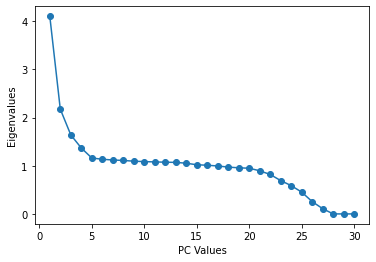

In [10]:
plt.plot(pc_vals, eigenvals, "o-")
plt.xlabel("PC Values")
plt.ylabel("Eigenvalues")
print(pca.explained_variance_ratio_)
print(np.cumsum(pca.explained_variance_ratio_))

In [11]:
x_test1 = X_test[:,:16]

Text(0, 0.5, 'Component 2')

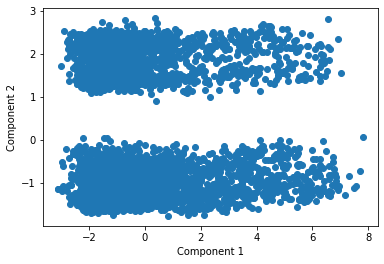

In [12]:
plt.scatter(x_test1[:,0], x_test1[:,1])
plt.xlabel("Component 1")
plt.ylabel("Component 2")

For n_clusters = 2 The average silhouette_score is : 0.2338378362194311
For n_clusters = 3 The average silhouette_score is : 0.1224534507753231
For n_clusters = 4 The average silhouette_score is : 0.13083414985348868
For n_clusters = 5 The average silhouette_score is : 0.14859548401322892
For n_clusters = 6 The average silhouette_score is : 0.1441603979471423
For n_clusters = 7 The average silhouette_score is : 0.1673768996989486
For n_clusters = 8 The average silhouette_score is : 0.1874407060520786


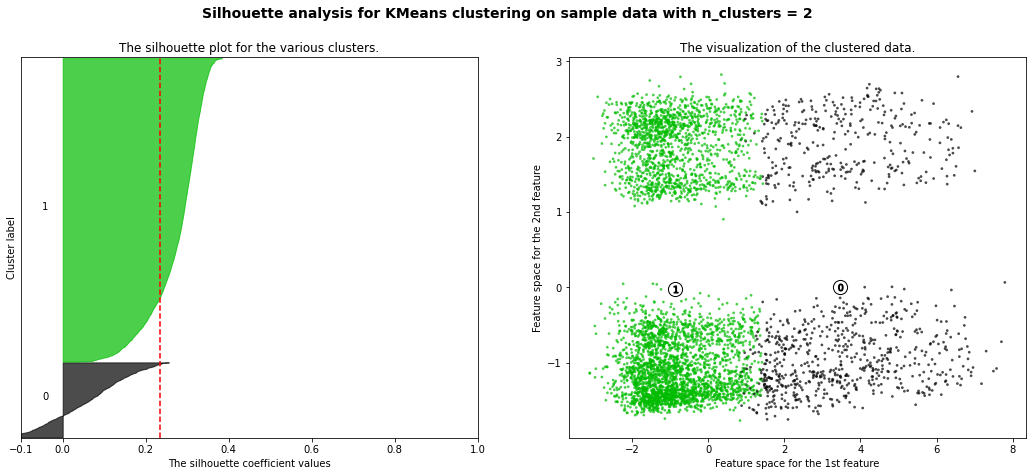

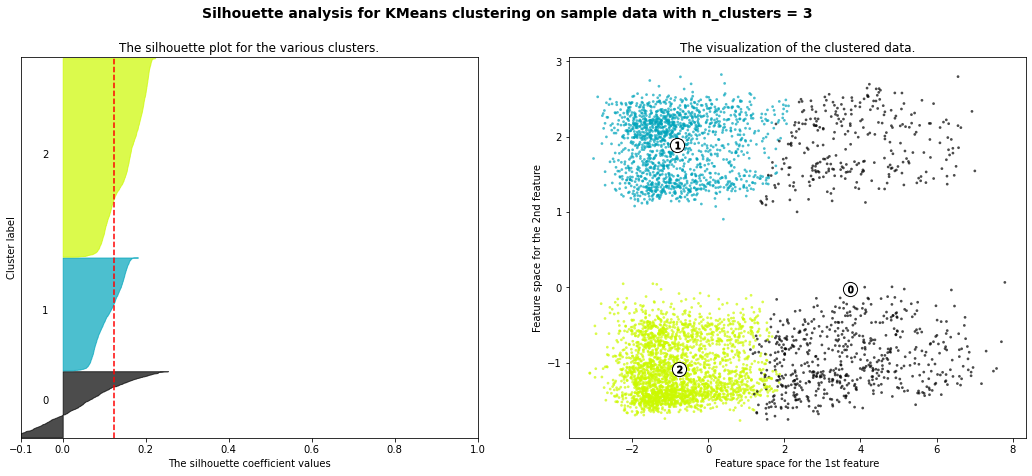

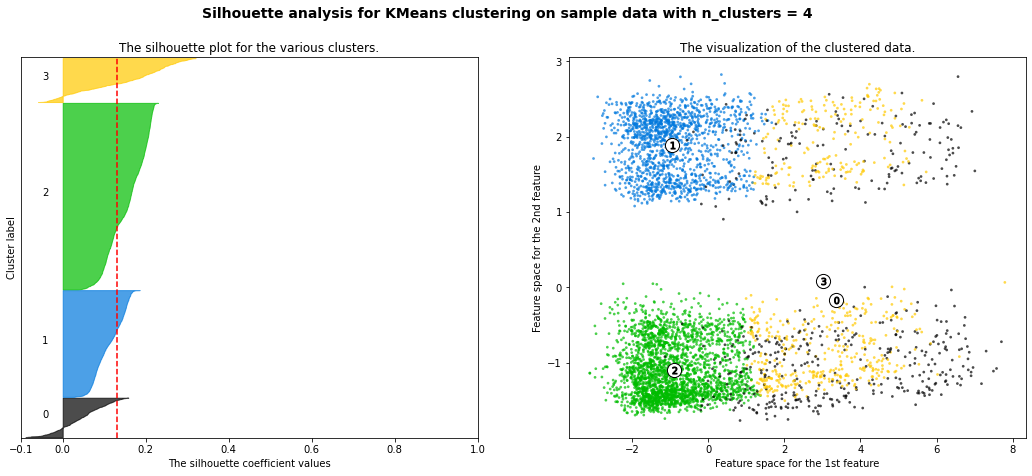

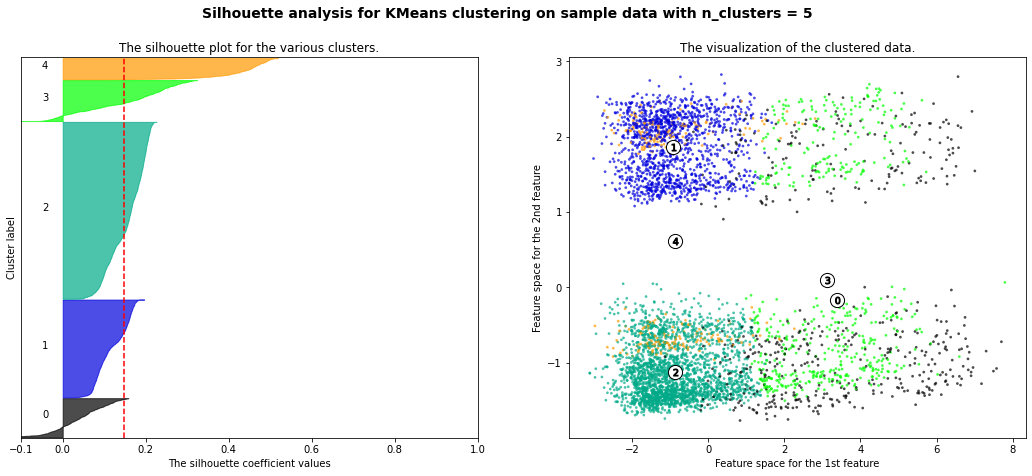

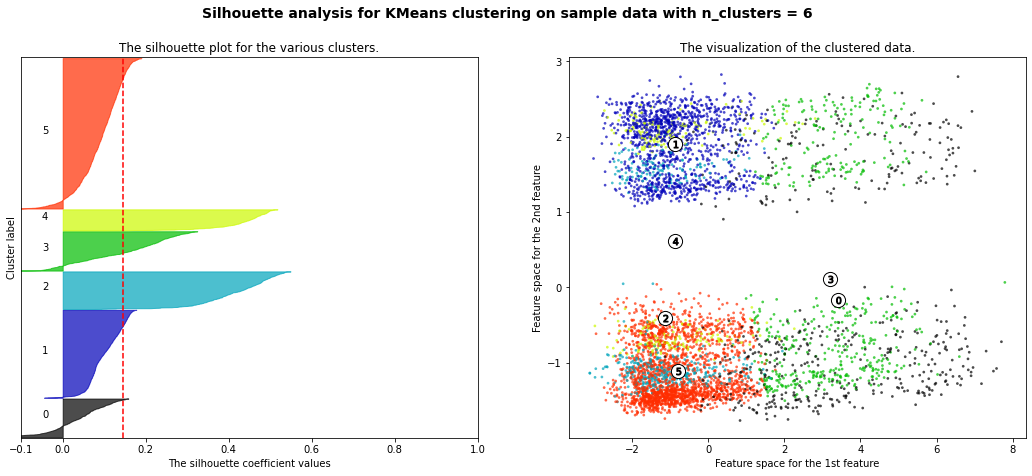

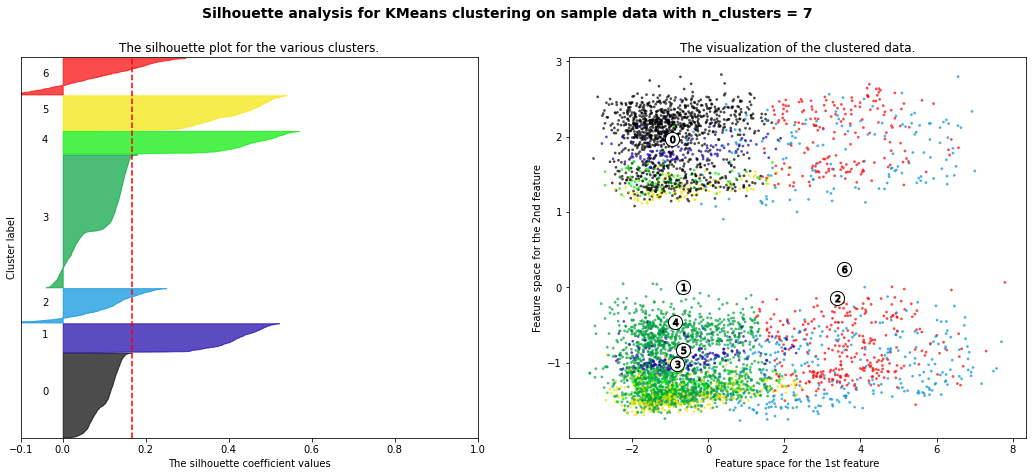

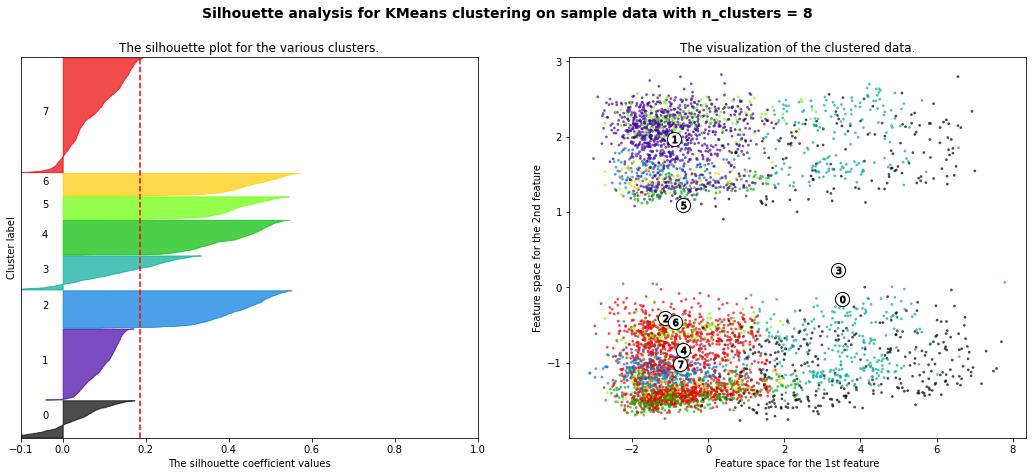

In [13]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from matplotlib import cm

range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.1, 1])

    ax1.set_ylim([0, len(x_test1) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(x_test1)

    silhouette_avg = silhouette_score(x_test1, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    sample_silhouette_values = silhouette_samples(x_test1, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10  

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        x_test1[:, 0], x_test1[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    centers = clusterer.cluster_centers_
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [14]:
y_train = trainGenres
y_test = testGenres

In [15]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, max_samples=0.5, max_features=0.25,bootstrap=True, criterion='gini')

clf.fit(X_train, y_train)

preds = clf.predict(X_test)

pred_proba = clf.predict_proba(X_test)

accuracy = metrics.accuracy_score(y_test, preds) 
print(accuracy)

auc = metrics.roc_auc_score(y_test, pred_proba, multi_class = "ovo")
print(auc)

0.5124
0.8986342222222221


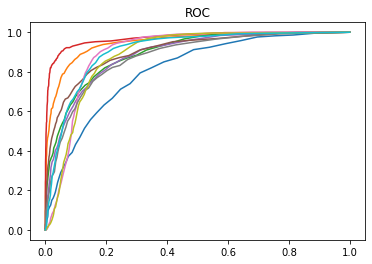

In [49]:
from sklearn.preprocessing import label_binarize
from sklearn import metrics
y_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
n_classes = y_bin.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:,i], pred_proba[:,i])
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i])
    plt.xlabel = ("False positive")
    plt.ylabel = ("True positive")
    plt.title("ROC")
